In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

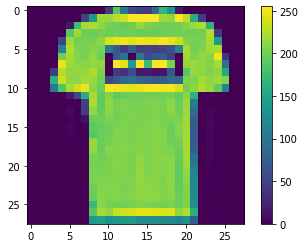

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4960 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3778 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3383 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2959 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2808 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2683 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2478 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 695us/step - loss: 0.3414 - accuracy: 0.8823
Test accuracy: 0.8823000192642212


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([3.2034755e-08, 5.9055105e-10, 1.3788223e-09, 1.0730033e-12,
       7.6346094e-09, 3.6424980e-04, 1.2554661e-08, 6.2905760e-03,
       3.4441430e-09, 9.9334514e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

Pick a number: 4


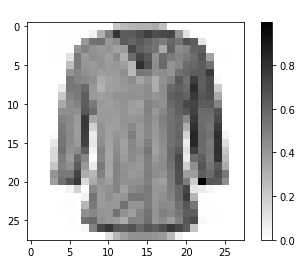

In [17]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)